# Project 3 Sonar Dataset

Object is to develop a model to predict type of objec i.e Rock or Mine based on sonar charateristics

Target variable is col-60 and target variable has only two types of values logistic regression will be suitable approach

# Importing Required Libraries

In [29]:
#importing required libraries
import numpy as np
import pandas as pd

# Loading Dataset

In [30]:
#loading/importing dataset
snr = pd.read_csv('sonar.csv', header = None , prefix = 'Col-')
snr.head()

,Col-0,Col-1,Col-2,Col-3,Col-4,Col-5,Col-6,Col-7,Col-8,Col-9,...,Col-51,Col-52,Col-53,Col-54,Col-55,Col-56,Col-57,Col-58,Col-59,Col-60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Data Prepration

In [31]:
snr['Col-60'].nunique()

2

In [32]:
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder
ohe = LabelEncoder()
snr['Col-60'] = ohe.fit_transform(snr['Col-60'].astype('str'))


In [33]:
snr.sample(5)

,Col-0,Col-1,Col-2,Col-3,Col-4,Col-5,Col-6,Col-7,Col-8,Col-9,...,Col-51,Col-52,Col-53,Col-54,Col-55,Col-56,Col-57,Col-58,Col-59,Col-60
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,1
68,0.0195,0.0142,0.0181,0.0406,0.0391,0.0249,0.0892,0.0973,0.0840,0.1191,...,0.0028,0.0067,0.0120,0.0012,0.0022,0.0058,0.0042,0.0067,0.0012,1
37,0.0333,0.0221,0.0270,0.0481,0.0679,0.0981,0.0843,0.1172,0.0759,0.0920,...,0.0022,0.0032,0.0060,0.0054,0.0063,0.0143,0.0132,0.0051,0.0041,1
197,0.0366,0.0421,0.0504,0.0250,0.0596,0.0252,0.0958,0.0991,0.1419,0.1847,...,0.0132,0.0027,0.0022,0.0059,0.0016,0.0025,0.0017,0.0027,0.0027,0
158,0.0107,0.0453,0.0289,0.0713,0.1075,0.1019,0.1606,0.2119,0.3061,0.2936,...,0.0164,0.0120,0.0113,0.0021,0.0097,0.0072,0.0060,0.0017,0.0036,0


In [34]:
snr.shape

(208, 61)

In [35]:
snr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col-0   208 non-null    float64
 1   Col-1   208 non-null    float64
 2   Col-2   208 non-null    float64
 3   Col-3   208 non-null    float64
 4   Col-4   208 non-null    float64
 5   Col-5   208 non-null    float64
 6   Col-6   208 non-null    float64
 7   Col-7   208 non-null    float64
 8   Col-8   208 non-null    float64
 9   Col-9   208 non-null    float64
 10  Col-10  208 non-null    float64
 11  Col-11  208 non-null    float64
 12  Col-12  208 non-null    float64
 13  Col-13  208 non-null    float64
 14  Col-14  208 non-null    float64
 15  Col-15  208 non-null    float64
 16  Col-16  208 non-null    float64
 17  Col-17  208 non-null    float64
 18  Col-18  208 non-null    float64
 19  Col-19  208 non-null    float64
 20  Col-20  208 non-null    float64
 21  Col-21  208 non-null    float64
 22  Co

In [36]:
snr.describe()

,Col-0,Col-1,Col-2,Col-3,Col-4,Col-5,Col-6,Col-7,Col-8,Col-9,...,Col-51,Col-52,Col-53,Col-54,Col-55,Col-56,Col-57,Col-58,Col-59,Col-60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [37]:
np.where(snr.mean()<snr.median())

(array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64),)

In [38]:
snr.skew()

Col-0     2.131088
Col-1     2.155644
Col-2     2.652518
Col-3     3.401697
Col-4     2.018141
            ...   
Col-56    1.653090
Col-57    2.098330
Col-58    1.737506
Col-59    2.775754
Col-60    0.135903
Length: 61, dtype: float64

# EDA

Univeriate Analysis

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

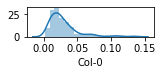

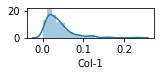

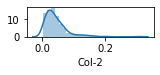

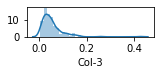

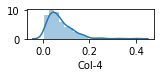

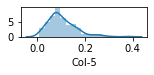

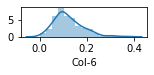

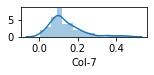

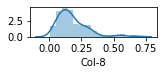

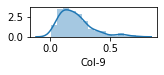

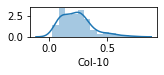

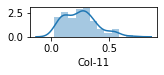

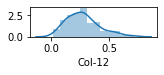

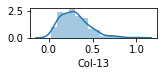

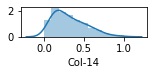

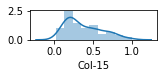

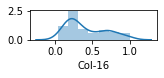

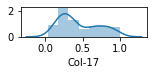

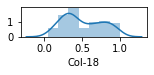

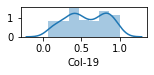

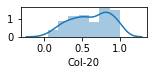

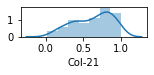

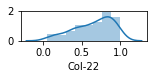

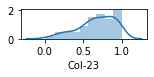

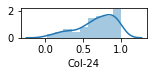

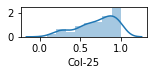

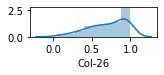

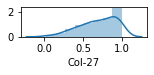

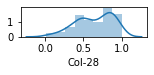

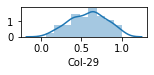

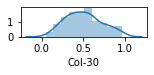

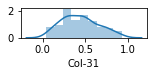

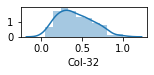

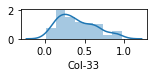

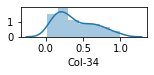

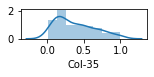

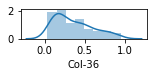

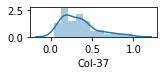

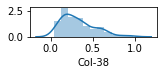

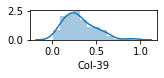

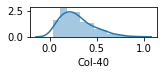

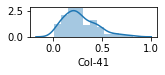

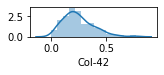

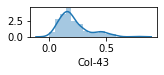

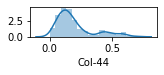

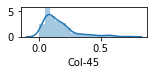

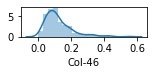

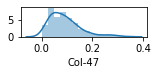

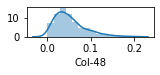

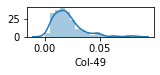

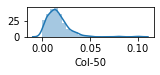

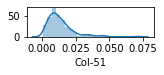

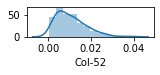

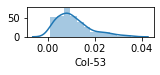

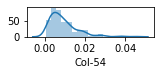

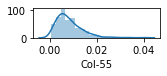

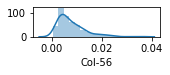

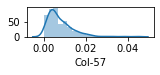

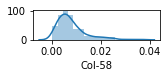

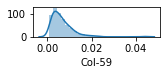

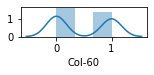

In [40]:
collist = snr.columns.values
for i in range(0,len(collist)):
    plt.figure(figsize = (5,40))
    plt.subplot(61,2,i+1)
    sns.distplot(snr[collist[i]])
    plt.show()

In [48]:
# Distribution plot shows right sided skewness in most of the columns data

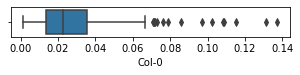

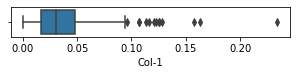

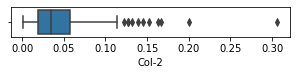

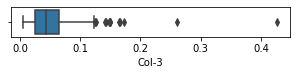

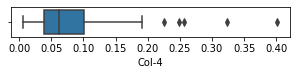

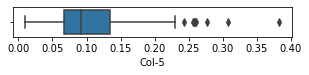

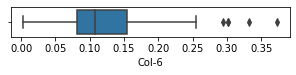

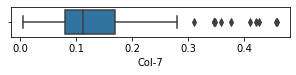

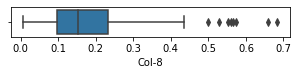

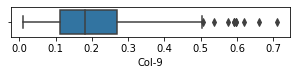

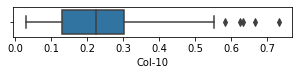

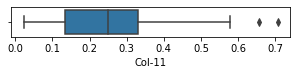

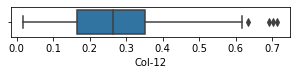

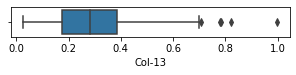

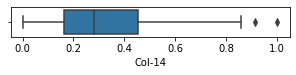

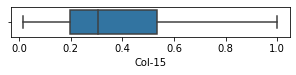

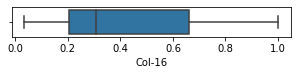

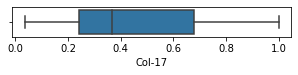

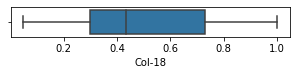

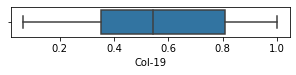

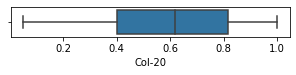

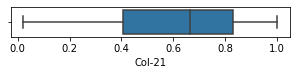

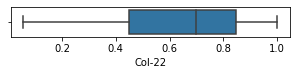

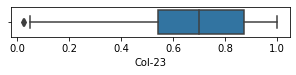

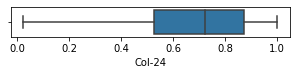

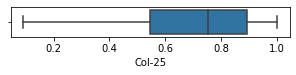

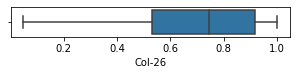

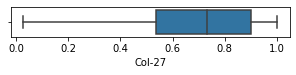

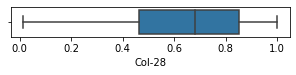

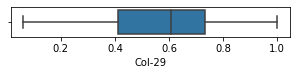

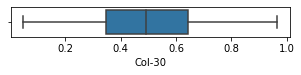

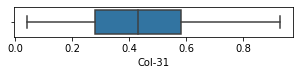

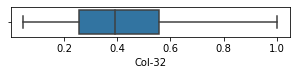

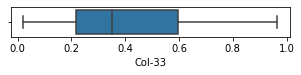

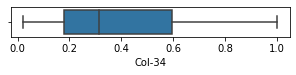

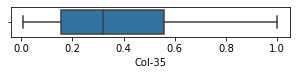

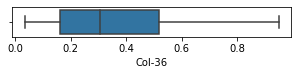

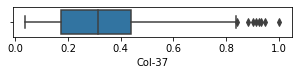

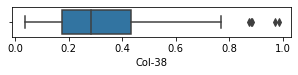

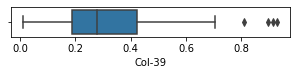

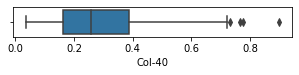

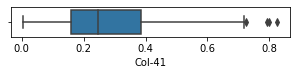

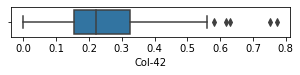

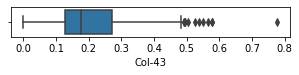

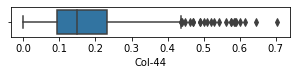

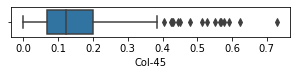

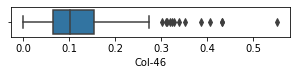

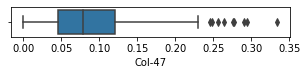

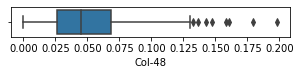

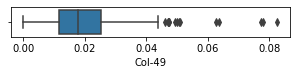

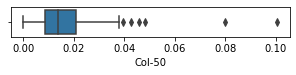

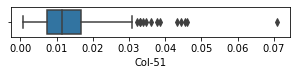

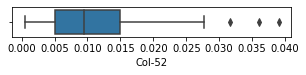

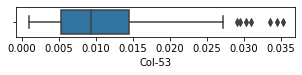

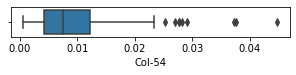

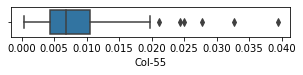

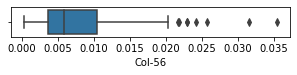

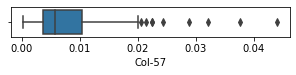

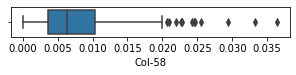

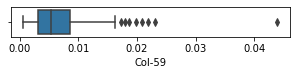

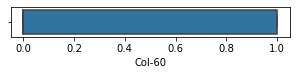

In [41]:
collist = snr.columns.values
for i in range(0,len(collist)):
    plt.figure(figsize = (5,40))
    plt.subplot(61,1,i+1)
    sns.boxplot(snr[collist[i]])
    plt.show()

In [42]:
import scipy
from scipy.stats import zscore
z = np.abs(zscore(snr))
threshold = 3
new_snr = snr[(z<3).all(axis =1)]

# Building Model

In [43]:
x = new_snr.iloc[:,0:-1]
y = new_snr.iloc[:,-1]

In [44]:
x.shape

(168, 60)

In [45]:
y.shape

(168,)

In [49]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = power_transform(x,method = 'yeo-johnson')
ssc = StandardScaler()
x = ssc.fit_transform(x)
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

In [50]:
# To find the best random state
best_r_state = 0
accu = 0
for i in range (30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    lr.score(x_train,y_train)
    tempaccu = accuracy_score(y_test,predlr)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f'For accuracy is {accu * 100}% best random state is {best_r_state}')

For accuracy is 97.2972972972973% best random state is 65


In [52]:
# To find the best fit model
model = [LogisticRegression(), SVC(kernel = 'poly'), SVC(kernel = 'rbf'), SVC(kernel = 'linear'),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB()]
for m in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = 65)
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    mpred = m.predict(x_test)
    ack=accuracy_score(y_test,mpred)
    cvscore = cross_val_score(m,x,y,cv = 5).mean()
    print(f'accuracy is {ack *100}% & cross_val Score is {cvscore} for model {m}')

accuracy is 97.2972972972973% & cross_val Score is 0.7388591800356507 for model LogisticRegression()
accuracy is 97.2972972972973% & cross_val Score is 0.6900178253119429 for model SVC(kernel='poly')
accuracy is 91.8918918918919% & cross_val Score is 0.7092691622103386 for model SVC()
accuracy is 86.48648648648648% & cross_val Score is 0.726916221033868 for model SVC(kernel='linear')
accuracy is 86.48648648648648% & cross_val Score is 0.6966131907308378 for model KNeighborsClassifier()
accuracy is 81.08108108108108% & cross_val Score is 0.6144385026737968 for model DecisionTreeClassifier()
accuracy is 75.67567567567568% & cross_val Score is 0.6552584670231729 for model GaussianNB()


# Conclusion - Accuracy acheived with Logistic Regression & SVC('poly') is same though Cross validation score is better for Logestic regression

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = 65)
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
ack=accuracy_score(y_test,predlr)
cvscore = cross_val_score(lr,x,y,cv = 5).mean()
print(f'accuracy is {ack *100}% & cross_val Score is {cvscore} the difference is  {ack - cvscore}')
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

accuracy is 97.2972972972973% & cross_val Score is 0.7388591800356507 the difference is  0.23411379293732237
[[17  0]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.95      0.97        20

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



# ROC-AUC Curve

0.988235294117647


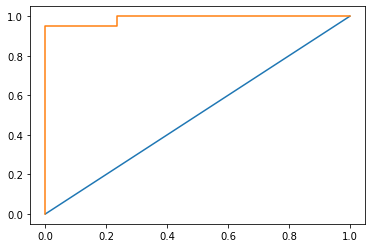

In [56]:
y_pred_prob = lr.predict_proba(x_test)[0:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
auc_score = roc_auc_score(y_test,y_pred_prob)
print(auc_score)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label = 'Logistics Regression')
plt.show() 

# Serilization

In [57]:
import joblib

In [58]:
joblib.dump(lr,'Project_3_Sonar.pkl')

['Project_3_Sonar.pkl']

In [59]:
joblib.load('Project_3_Sonar.pkl')

LogisticRegression()